In [1]:
import pandas as pd
import numpy as np

In [3]:
import uproot
files = ["/ceph/users/lgerken/programmierkurs/B2HHH_MagnetUp.root","/ceph/users/lgerken/programmierkurs/B2HHH_MagnetDown.root"]
data = pd.DataFrame()
for file in files:
    with uproot.open(file) as f:
        data = pd.concat([data, f['DecayTree'].pandas.df()], ignore_index=True)

In [4]:
class lorentz_vector:
    def __init__(self,E,P1,P2,P3):
        self.e  = E
        self.p1 = P1
        self.p2 = P2
        self.p3 = P3
        self.m  = (self*self)**0.5
        self.p  = (self.p1**2 + self.p2**2 + self.p3**2)**0.5
    def __str__(self):
        return f"({self.e},{self.p1},{self.p2},{self.p3})"
    def __repr__(self):
        return f"({self.e},{self.p1},{self.p2},{self.p3})"
    def __mul__(self, other):
        E_g  = self.e  * other.e
        P1_g = self.p1 * other.p1
        P2_g = self.p2 * other.p2
        P3_g = self.p3 * other.p3
        return E_g - (P1_g+P2_g+P3_g)
    def __add__(self, other):
        E_g  = self.e  + other.e
        P1_g = self.p1 + other.p1
        P2_g = self.p2 + other.p2
        P3_g = self.p3 + other.p3
        return lorentz_vector(E_g,P1_g,P2_g,P3_g)
    def __sub__(self, other):
        E_g  = self.e  - other.e
        P1_g = self.p1 - other.p1
        P2_g = self.p2 - other.p2
        P3_g = self.p3 - other.p3
        return lorentz_vector(E_g,P1_g,P2_g,P3_g)

In [5]:
def energy(m,p1,p2,p3):
    return (m**2 + (p1**2 + p2**2 + p3**2))**0.5

In [6]:
M_K = 493.677

In [7]:
p1 = lorentz_vector( energy(M_K,data["H1_PX"],data["H1_PY"],data["H1_PZ"]) ,data["H1_PX"],data["H1_PY"],data["H1_PZ"] )
p2 = lorentz_vector( energy(M_K,data["H2_PX"],data["H2_PY"],data["H2_PZ"]) ,data["H2_PX"],data["H2_PY"],data["H2_PZ"] )
p3 = lorentz_vector( energy(M_K,data["H3_PX"],data["H3_PY"],data["H3_PZ"]) ,data["H3_PX"],data["H3_PY"],data["H3_PZ"] )

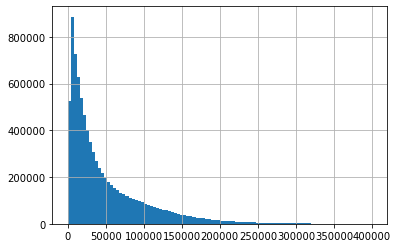

In [16]:
p1.p3.hist(bins=100,range=(0,0.04*10**(7)))

In [17]:
p_B = p1+p2+p3

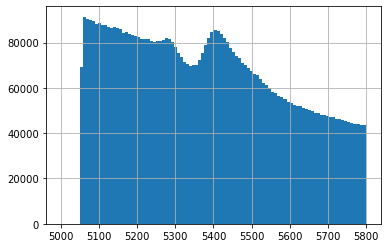

In [18]:
(p_B.m).hist(bins=100,range=(5000,5800))

In [20]:
data["B_M"] = p_B.m

In [21]:
data.columns

Index(['B_FlightDistance', 'B_VertexChi2', 'H1_PX', 'H1_PY', 'H1_PZ',
       'H1_ProbK', 'H1_ProbPi', 'H1_Charge', 'H1_IPChi2', 'H1_isMuon', 'H2_PX',
       'H2_PY', 'H2_PZ', 'H2_ProbK', 'H2_ProbPi', 'H2_Charge', 'H2_IPChi2',
       'H2_isMuon', 'H3_PX', 'H3_PY', 'H3_PZ', 'H3_ProbK', 'H3_ProbPi',
       'H3_Charge', 'H3_IPChi2', 'H3_isMuon', 'B_M'],
      dtype='object')

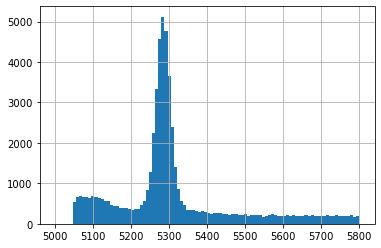

In [22]:
cut = "H1_ProbK>0.3 & H2_ProbK>0.3 & H3_ProbK>0.3"
data.query(cut)["B_M"].hist(bins=100,range=(5000,5800))

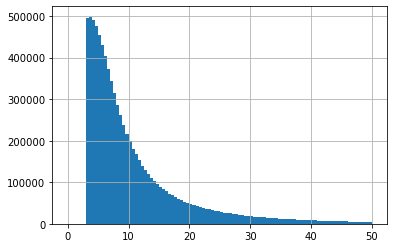

In [13]:
data["B_FlightDistance"].hist(bins=100,range=(0,50))